In [1]:
#import packages 
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import fuzzywuzzy
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.formula.api import ols
from ast import literal_eval
import imdb
import requests

In [2]:
movieDF = pd.read_csv("Top_10000_Popular_Movies.csv",converters={'genre': literal_eval})
movieDF = movieDF.drop('Unnamed: 0',1)

movieDF

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"[Science Fiction, Action]"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"[Science Fiction, Action]"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"[Comedy, Action, Adventure, Science Fiction]"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"[Action, Comedy, Adventure]"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"[Action, Adventure]"
...,...,...,...,...,...,...,...,...
9995,34653,en,A Single Man,11.647,2009-10-19,7.3,1209,"[Romance, Drama]"
9996,33518,en,Alligator,9.894,1980-07-02,5.8,182,"[Horror, Science Fiction, Thriller]"
9997,26320,en,Taking Woodstock,9.197,2009-08-26,6.2,321,"[Music, Comedy, Drama]"
9998,287318,en,3 Scream Queens,7.350,2014-11-25,5.2,5,[Horror]


In [3]:
movieDF2 = movieDF.sort_values("vote_average",ascending=False)
movieDF2.head(15)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
505,875828,en,Untitled Peaky Blinders Film,98.046,NaN,10.0,2,[]
8141,843141,en,Pokémon Live!,9.502,2016-09-24,10.0,1,"[Music, Comedy]"
9732,514466,fi,Supercool,5.907,2021-07-02,10.0,1,"[Comedy, Action]"
4964,794819,hi,रश्मि रॉकेट,13.048,2021-10-15,10.0,1,[Drama]
4354,584948,es,Eyes of Desire,15.329,1998-09-01,10.0,1,[]
5473,882251,en,Silent Hours,15.822,2021-10-07,10.0,1,[Thriller]
8308,719923,ko,TXT (투모로우바이투게더) 'Eternally',11.247,NaN,10.0,2,[Drama]
6738,856577,ja,ソードアート・オンライン Extra Edition,9.533,2013-12-31,10.0,1,[Animation]
6602,329824,zh,Ebola Zombies,11.595,2015-03-23,9.5,2,"[Horror, Science Fiction]"
5892,710692,ko,이모의 유혹 3,20.696,2020-05-22,9.5,1,[Romance]


In [4]:
print(type(movieDF.loc[0][7]))

<class 'list'>


In [5]:
ia = imdb.IMDb()

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

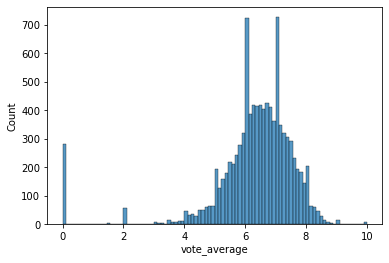

In [6]:
sns.histplot(x="vote_average",data=movieDF)

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

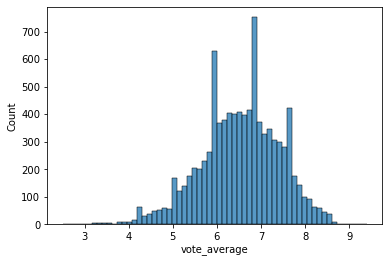

In [8]:
movieDF = movieDF[movieDF['vote_count'] > 10]
sns.histplot(x="vote_average",data=movieDF)

In [10]:
genreList = []

for ind,row in movieDF.iterrows():
    genreList.extend(row['genre'])
    
print(genreList)

['Science Fiction', 'Action', 'Science Fiction', 'Action', 'Comedy', 'Action', 'Adventure', 'Science Fiction', 'Action', 'Comedy', 'Adventure', 'Action', 'Adventure', 'Animation', 'Comedy', 'Family', 'Animation', 'Action', 'Adventure', 'Science Fiction', 'Horror', 'Thriller', 'Crime', 'Drama', 'Fantasy', 'Adventure', 'Comedy', 'Animation', 'Action', 'Crime', 'Thriller', 'Science Fiction', 'Adventure', 'Science Fiction', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction', 'Fantasy', 'Action', 'Action', 'Adventure', 'Fantasy', 'Crime', 'Drama', 'Thriller', 'Horror', 'Fantasy', 'Mystery', 'Action', 'Crime', 'Thriller', 'Adventure', 'Fantasy', 'Comedy', 'Action', 'Science Fiction', 'Animation', 'Comedy', 'Adventure', 'Family', 'Animation', 'Adventure', 'Animation', 'Action', 'Adventure', 'Fantasy', 'Action', 'Action', 'Adventure', 'Science Fiction', 'Animation', 'Family', 'Adventure', 'Comedy', 'Horror', 'Mystery', 'Family', 'Horror', 'Mystery', 'Thriller', 'Comedy',

In [11]:
def my_function(x):
  return list( dict.fromkeys(x) )

genreList = my_function(genreList)

print(genreList)

['Science Fiction', 'Action', 'Comedy', 'Adventure', 'Animation', 'Family', 'Horror', 'Thriller', 'Crime', 'Drama', 'Fantasy', 'Mystery', 'Western', 'TV Movie', 'Romance', 'Music', 'History', 'War', 'Documentary']


In [28]:
Action = 0
Thriller = 0
Adventure = 0
Animation = 0
Comedy = 0
Fantasy = 0
Drama = 0
SciFi = 0
Documentary = 0
Crime = 0
Family = 0
Western = 0
History = 0
Romance = 0
Horror = 0
Mystery = 0
Musical = 0
Sport = 0
Music = 0
War = 0
TVmovie = 0



for col,row in movieDF.iterrows():
    if "Action" in row['genre']:
        Action = Action + 1
    if "Thriller" in row['genre']:
        Thriller = Thriller + 1
    if "Adventure" in row['genre']:
        Adventure  = Adventure + 1
    if "Animation" in row['genre']:
        Animation = Animation + 1
    if "Comedy" in row['genre']:
        Comedy = Comedy + 1
    if "Fantasy" in row['genre']:
        Fantasy = Fantasy + 1
    if "Drama" in row['genre']:
        Drama = Drama + 1
    if "Science Fiction" in row['genre']:
        SciFi = SciFi + 1
    if "Documentary" in row['genre']:
        Documentary = Documentary + 1
    if "Crime" in row['genre']:
        Crime = Crime + 1
    if "Family" in row['genre']:
        Family = Family + 1
    if "Western" in row['genre']:
        Western = Western + 1
    if "History" in row['genre']:
        History = History + 1
    if "Romance" in row['genre']:
        Romance = Romance + 1
    if "Horror" in row['genre']:
        Horror = Horror + 1
    if "Mystery" in row['genre']:
        Mystery = Mystery + 1
    if "Music" in row['genre']:
        Music = Music + 1
    if "War" in row['genre']:
        War = War + 1
    if "TV Movie" in row['genre']:
        TVmovie = TVmovie + 1
        
        
genreDict = dict(genre=['Action','Thriller','Adventure','Animation','Comedy','Fantasy','Drama','SciFi','Documentary','Crime','Family','Western','History','Romance','Horror','Mystery','Music','War','TV Movie'],
                 count=[Action,Thriller,Adventure,Animation,Comedy,Fantasy,Drama,SciFi,Documentary,Crime,Family,Western,History,Romance,Horror,Mystery,Music,War,TVmovie])

print(genreDict)

{'genre': ['Action', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'Fantasy', 'Drama', 'SciFi', 'Documentary', 'Crime', 'Family', 'Western', 'History', 'Romance', 'Horror', 'Mystery', 'Music', 'War', 'TV Movie'], 'count': [2421, 2470, 1652, 1255, 2879, 1206, 3533, 1197, 222, 1176, 1264, 110, 374, 1311, 1486, 779, 301, 246, 212]}


In [29]:
genres = pd.DataFrame.from_dict(genreDict)
genres = genres.sort_values('count',ascending=False)
genres.head(25)

,genre,count
6,Drama,3533
4,Comedy,2879
1,Thriller,2470
0,Action,2421
2,Adventure,1652
14,Horror,1486
13,Romance,1311
10,Family,1264
3,Animation,1255
5,Fantasy,1206


In [30]:
fig = px.bar(x=genres['genre'],y=genres['count'],labels=dict(x="Genre",y="Count"),title="Count of movie genres")
fig.show()

In [31]:
movieDF.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"[Science Fiction, Action]"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"[Science Fiction, Action]"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"[Comedy, Action, Adventure, Science Fiction]"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"[Action, Comedy, Adventure]"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"[Action, Adventure]"


In [32]:
#url = "https://imdb8.p.rapidapi.com/title/auto-complete"
#
#querystring = {"q":"Free Guy"}
#
#headers = {
#    'x-rapidapi-key': "d46caec696msh36bd6d85e9effe2p10a6b3jsn7171d52217cc",
#    'x-rapidapi-host': "imdb8.p.rapidapi.com"
#    }
#
#response = requests.request("GET", url, headers=headers, params=querystring)
#
#print(response.text)

In [33]:
movies = ia.search_movie('matrix')
movies[0]

<Movie id:0133093[http] title:_The Matrix (1999)_>

In [34]:
movieDFHigh = movieDF.sort_values('vote_average', ascending=False)
movieDFHigh = movieDFHigh[movieDFHigh['original_language'] == 'en']

movieTop50 = movieDFHigh.head(50)

In [35]:
#ratings = []
#
#for ind,row in movieTop50.iterrows(): 
#    code = ia.search_movie(row['original_title'])[0].movieID
#    rating = ia.get_movie(code).data['rating']
#    ratings.append(rating)    
#
#print(ratings)

In [36]:
#movieTop50['IMDB_rating'] = ratings
#movieTop50.head()

In [37]:
movieTop50 = pd.read_csv("movieTop50.csv")
movieTop50.head()

,id,original_language,Title,popularity,release_date,TMDB rating,vote_count,genre,IMDB rating
0,654754,en,Billie Eilish: The World's a Little Blurry,15.367,2021-02-26,8.7,195,"['Documentary', 'Music']",7.8
1,278,en,The Shawshank Redemption,58.255,1994-09-23,8.7,19908,"['Drama', 'Crime']",9.3
2,724089,en,Gabriel's Inferno Part II,9.417,2020-07-31,8.7,1314,['Romance'],6.8
3,738362,en,The Fresh Prince of Bel-Air Reunion Special,9.725,2020-11-18,8.7,106,['Documentary'],8.3
4,238,en,The Godfather,61.648,1972-03-14,8.7,14928,"['Drama', 'Crime']",9.2


In [43]:
df1 = movieTop50
df1.rename(columns={"vote_average":"TMDB rating","IMDB_rating":"IMDB rating","original_title":"Title"},inplace=True)

fig = px.scatter(df1,
                 x="TMDB rating",
                 y="IMDB rating",
                 title='TMDB ratings vs IMDB ratings van top 50 TMDB films',
                 labels=dict(x='TMDB rating',y='IMDB rating'),
                 color="Title",
                 hover_name="Title",
                 hover_data=["TMDB rating","IMDB rating","genre"])
fig.update_layout(legend_title_text='Movie name')
fig.show()

In [39]:
movieDF.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"[Science Fiction, Action]"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"[Science Fiction, Action]"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"[Comedy, Action, Adventure, Science Fiction]"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"[Action, Comedy, Adventure]"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"[Action, Adventure]"


In [40]:
for genre in genreList: 
    print(genre)

Science Fiction
Action
Comedy
Adventure
Animation
Family
Horror
Thriller
Crime
Drama
Fantasy
Mystery
Western
TV Movie
Romance
Music
History
War
Documentary


In [41]:
movieTop50.head()

,id,original_language,Title,popularity,release_date,TMDB rating,vote_count,genre,IMDB rating
0,654754,en,Billie Eilish: The World's a Little Blurry,15.367,2021-02-26,8.7,195,"['Documentary', 'Music']",7.8
1,278,en,The Shawshank Redemption,58.255,1994-09-23,8.7,19908,"['Drama', 'Crime']",9.3
2,724089,en,Gabriel's Inferno Part II,9.417,2020-07-31,8.7,1314,['Romance'],6.8
3,738362,en,The Fresh Prince of Bel-Air Reunion Special,9.725,2020-11-18,8.7,106,['Documentary'],8.3
4,238,en,The Godfather,61.648,1972-03-14,8.7,14928,"['Drama', 'Crime']",9.2


In [48]:
fig = go.Figure()

for genre in genreList:
    tempList = [genre]
    tempDF = movieDF['genre'].apply(lambda s: len(set(s) & set(tempList)) > 0)
    df = movieDF[tempDF]
    fig.add_trace(go.Histogram(x=df['vote_average'],legendgroup=genre,showlegend=True,name=genre))#legendgrouptitle={"text":genre}))


fig.update_layout(title="Verdeling cijfers van films per genre",xaxis_title="Cijfer",yaxis_title="Aantal waarnemingen")    

fig.show()